In [2]:
import gerrychain
import functools

In [3]:
import gerrychain
import functools
import numpy as np 
import pandas as pd
import tqdm
import scipy.stats as ss
import sklearn as skl

In [5]:
from gerrychain import Graph, Partition, Election, GeographicPartition
from gerrychain.updaters import Tally, cut_edges
graph = Graph.from_json("./PA_VTD.json")

election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

initial_partition = GeographicPartition(
    graph,
    assignment="2011_PLA_1",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOT_POP", alias="population"),
        "SEN12": election
    }
)

In [5]:
# The ReCom proposal needs to know the ideal population for the districts so that
# we can improve speed by bailing early on unbalanced partitions.

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

# We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats)
# of the recom proposal.
proposal = functools.partial(recom,
                   pop_col="TOT_POP",
                   pop_target=ideal_population,
                   epsilon=0.02,
                   node_repeats=2
                  )

NameError: name 'recom' is not defined

In [6]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

chain = MarkovChain(
    proposal=proposal,
    constraints=[],
    accept=contiguous,
    initial_state=initial_partition,
    total_steps=1000
)

NameError: name 'proposal' is not defined

In [87]:
count

NameError: name 'count' is not defined

In [7]:
from gerrychain import MarkovChain
from gerrychain.constraints import contiguous
from gerrychain.proposals import *
from gerrychain.accept import always_accept

g2 = []
for k in range(10):
    chain = MarkovChain(
        proposal=propose_random_flip,
        constraints=[],
        accept=contiguous,
        initial_state=initial_partition,
        total_steps=500
    )

    data = pd.DataFrame(
        sorted(partition["SEN12"].percents("Dem"))
        for partition in chain.with_progress_bar()
    )


AttributeError: 'MarkovChain' object has no attribute 'fails'

In [53]:
g

[27]

In [26]:
np.array(f).mean()/500

0.14828

In [25]:
np.array(f).std()/500

0.018800042553143333

In [15]:
import matplotlib.pyplot as plt

(array([ 1.,  8., 11., 22., 26., 40., 21., 20.,  7.,  2.]),
 array([11. , 13.7, 16.4, 19.1, 21.8, 24.5, 27.2, 29.9, 32.6, 35.3, 38. ]),
 <a list of 10 Patch objects>)

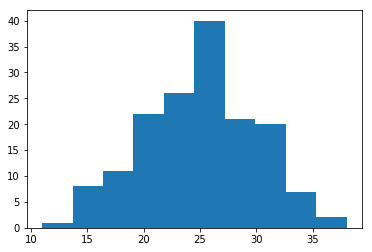

In [57]:
plt.hist(g)

In [70]:
g

[459, 454, 460, 462, 462, 464, 470, 479, 468, 467]

In [68]:
g2

[94, 107, 101, 111, 123, 104, 112, 108, 130, 125]

In [79]:
chunk = np.array([94, 107, 101, 111, 123, 104, 112, 108, 130, 125])
an = np.array([459, 454, 460, 462, 462, 464, 470, 479, 468, 467])
edge = np.array(g2)

In [77]:
chunk.mean()/500, chunk.std()/500

(0.223, 0.021563858652847823)

In [78]:
an.mean()/500, an.std()/500

(0.929, 0.013152946437965905)

In [80]:
edge.mean()/500, edge.std()/500

(0.137, 0.01647422228816887)

In [81]:
x = ["Chunk Flips", "Any Flip", "Edge Flip"]
y = [22.3, 92.9, 13.7]
s = [2.16, 1.32, 1.65]

Text(0.5, 1.0, 'Percentage Non-Contiguous for Standard Redistricting Proposals')

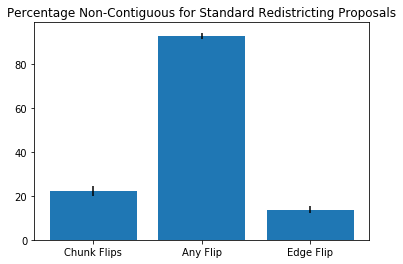

In [86]:
plt.bar(x, y, yerr = s)
plt.title("Percentage Non-Contiguous for Standard Redistricting Proposals")

In [54]:
chain = MarkovChain(
        proposal=propose_random_flip,
        constraints=[],
        accept=contiguous,
        initial_state=initial_partition,
        total_steps=50000
    )

In [56]:
count = 0
visited_buckets = set()
m4 = []
for partition in chain.with_progress_bar(): 
    q = mean_median(partition["SEN12"])
    m4.append(q)
    b = bucket(q)
    if b not in visited_buckets: 
        print(q, b, count)
        visited_buckets.add(b)
    count += 1

-0.05288069247284355 1 0
-0.04976248110949916 2 6515
-0.039886415554261534 3 39839


In [112]:
from gerrychain.metrics import mean_median
from gerrychain.metrics import partisan_bias
from gerrychain.metrics import partisan_gini
from gerrychain.metrics import efficiency_gap
from gerrychain.metrics import polsby_popper
from gerrychain.metrics import wasted_votes

In [15]:
buckets = [-0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01]

In [16]:
def bucket(value):
    for i in range(len(buckets)):
        if value < buckets[i]:
            return i 
        
    return len(buckets)

In [24]:
import matplotlib.pyplot as plt

In [28]:
x = np.linspace(0, 50000, 50000)

In [29]:
x

array([0.00000e+00, 1.00002e+00, 2.00004e+00, ..., 4.99980e+04,
       4.99990e+04, 5.00000e+04])

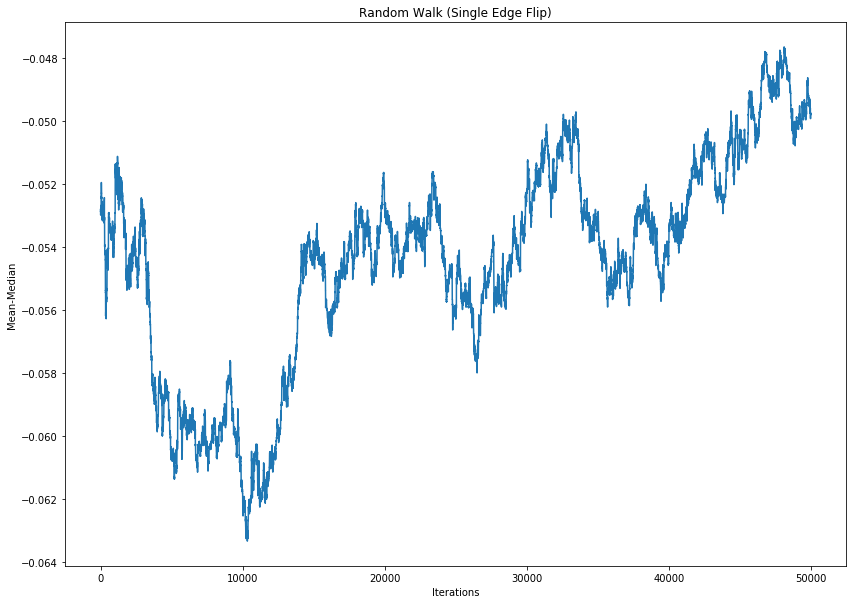

In [36]:
plt.plot(x, m)
plt.title("Random Walk (Single Edge Flip)")
plt.xlabel("Iterations")
plt.ylabel("Mean-Median")
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

In [37]:
chain = MarkovChain(
        proposal=propose_random_flip,
        constraints=[],
        accept=contiguous,
        initial_state=initial_partition,
        total_steps=50000
    )

In [114]:
from gerrychain.proposals import recom
from functools import partial

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

# We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats)
# of the recom proposal.
proposal = partial(recom,
                   pop_col="TOT_POP",
                   pop_target=ideal_population,
                   epsilon=0.02,
                   node_repeats=2
                  )

In [115]:
chain = MarkovChain(
        proposal=proposal,
        constraints=[],
        accept=contiguous,
        initial_state=initial_partition,
        total_steps=50000
    )

In [117]:
count = 0
visited_buckets = set()
most = 0
least = 1
points2  = []
for partition in chain.with_progress_bar(): 
    mm = mean_median(partition["SEN12"])
    p = pp(partition)
    bias = partisan_bias(partition["SEN12"])
    gini = partisan_gini(partition["SEN12"])
    gap = efficiency_gap(partition["SEN12"])
    cut = len(partition["cut_edges"])
    points2.append((mm, p, bias, gini, gap, cut))
    if count % 100 == 0: 
        print(count, mm, p, bias, gini, gap, cut)
    count += 1

0 -0.05288069247284355 0.17121345727320145 -0.2222222222222222 0.11064380503104 -0.07176053351222789 2361
100 -0.033668934694984554 0.16468104285782034 -0.1111111111111111 0.08245787375690854 -0.07109456642175466 1632
200 -0.022690127610165867 0.19000003724733638 -0.16666666666666669 0.08465834419419724 -0.007566483119933631 1497
300 -0.0165031485281254 0.19290738964920415 -0.1111111111111111 0.08167039606917044 -0.010706792194554348 1592
400 -0.02083964481236611 0.19778794343059902 -0.16666666666666669 0.09307476829044731 -0.010390190824280447 1623
500 -0.02993796064099219 0.18959564064286852 -0.1111111111111111 0.0897687590682178 -0.06337267891281008 1605
600 -0.02276229987960754 0.16205709793312406 -0.05555555555555558 0.06092057373611199 -0.0017711755903058797 1742
700 -0.028033227367882607 0.16299364859706286 -0.16666666666666669 0.0790640354343548 -0.01803586954140952 1786
800 -0.030277698786682072 0.18303082213493382 -0.16666666666666669 0.08179328681099446 -0.018630153302764133

7300 -0.04387531264035671 0.19619549925089255 -0.16666666666666669 0.09242012412184512 -0.07500691943246353 1578
7400 -0.016710931800090867 0.19068293478114107 -0.1111111111111111 0.08239279334957063 -0.004865686982434145 1633
7500 -0.023522606171649474 0.17178879144905224 -0.05555555555555558 0.0845175900806387 -0.0032627680951983575 1802
7600 -0.02048562297645229 0.1661274648968919 -0.05555555555555558 0.0784867816533296 -0.012238570808195142 1763
7700 -0.05763028380707197 0.18086933483102274 -0.1111111111111111 0.092013830399 -0.12049053481375097 1657
7800 -0.02712946127600646 0.17267177163080957 -0.1111111111111111 0.06582287567218718 -0.06590874820814305 1715
7900 -0.03749795893769714 0.19299061095568615 -0.16666666666666669 0.07272652681230027 -0.0730423255664929 1596
8000 -0.042238480830752434 0.21306079871102693 -0.1111111111111111 0.09233368289731428 -0.07053268497330972 1452
8100 -0.03504957317159252 0.1918915116710188 -0.1111111111111111 0.07838064962737856 -0.02154618044612

14600 -0.011084159697044904 0.18802512029366195 -0.05555555555555558 0.06748429803772098 -0.00749950627201977 1556
14700 -0.03717930049514995 0.15180274984879183 -0.1111111111111111 0.08198335988767762 -0.07174315573547187 1688
14800 -0.02507385491398806 0.15997604770230903 -0.16666666666666669 0.08040139599976374 -0.012118555537473819 1833
14900 -0.02651820685621531 0.16363483147737115 -0.1111111111111111 0.09350314278959383 -0.012223908309057244 1776
15000 -0.02307507509958895 0.15601808132765646 -0.1111111111111111 0.07469082891430265 0.04303253427540192 1704
15100 -0.05015207883674733 0.17985990037270513 -0.2222222222222222 0.08468763836067 -0.13659050192268807 1702
15200 -0.04854332793562888 0.18919841829333917 -0.2222222222222222 0.07151346515942297 -0.12715092979251477 1649
15300 -0.023050726511069097 0.18923036344526492 -0.16666666666666669 0.0808159231830709 -0.010032679271226728 1596
15400 -0.034824453613730766 0.17832394630667706 -0.1111111111111111 0.07340316967145973 -0.02

21900 -0.017997318806551532 0.17571046733098447 0.0 0.06964446959383139 -0.04770697520426581 1598
22000 -0.025864158616985322 0.1725068258386281 -0.16666666666666669 0.0696308111467548 0.004083324991397096 1633
22100 -0.01894716647376138 0.170610744855022 -0.05555555555555558 0.08995240370718717 0.0035922217795314047 1688
22200 -0.029211535227414154 0.17065003264393866 -0.05555555555555558 0.07839092696113653 0.04471854065775247 1715
22300 -0.02787948123889583 0.15373914813367276 -0.1111111111111111 0.06248416000662879 -0.07205704182812764 1809
22400 -0.010555840316789356 0.19015576820806382 -0.16666666666666669 0.07893272639010525 -0.0038241064881196648 1556
22500 -0.03013376524996625 0.19794791218411312 -0.16666666666666669 0.0870936156877996 -0.07060509237645984 1626
22600 -0.03600060316454745 0.189722048879427 -0.1111111111111111 0.08620803336798757 -0.07923333955433605 1592
22700 -0.01666287594590854 0.18249035953209114 -0.16666666666666669 0.08104908849646159 -0.01786607418102249

29200 -0.020085033996613322 0.18131822437613979 -0.05555555555555558 0.08067964737986043 -0.016389325193775787 1768
29300 -0.03192679355330941 0.1733863424213585 -0.1111111111111111 0.06906744583752918 -0.02488180849074552 1728
29400 -0.03183198935709197 0.16859764376298714 -0.16666666666666669 0.06707892928735623 -0.022173590594423146 1651
29500 -0.036233582581470136 0.18687267657257323 -0.16666666666666669 0.06469929061804972 -0.08016902422154348 1533
29600 -0.02392338816946049 0.19778147843945612 -0.16666666666666669 0.07109186612950386 -0.006753710019573532 1743
29700 -0.04696146909326537 0.18828611419297783 -0.16666666666666669 0.08146175679386301 -0.06458640800811398 1715
29800 -0.030076006806376787 0.17344225612383396 -0.1111111111111111 0.07514602768648605 -0.0113095838257791 1764
29900 -0.03770998737773934 0.1605945044167082 -0.1111111111111111 0.07795488572981525 -0.020089524513254808 1810
30000 -0.018591115516764067 0.19380581983525136 0.0 0.08416395312015099 -0.030243033638

36500 -0.0465688910242984 0.16257335434766956 -0.16666666666666669 0.0739447274911132 -0.1298815939838137 1712
36600 -0.03591163209843806 0.17994693475244036 -0.16666666666666669 0.07664125480739004 0.043616862018823394 1694
36700 -0.023114523142290566 0.16630570320677507 -0.1111111111111111 0.0491386413076215 -0.017984460285172938 1810
36800 -0.031325513684995365 0.172039778637762 -0.1111111111111111 0.06613530953015125 -0.020976334183335908 1852
36900 -0.02547675477262079 0.18921569172299732 -0.16666666666666669 0.08115788270170057 -0.017797468166537753 1692
37000 -0.04876346471037907 0.18220759303763207 -0.05555555555555558 0.07625013812664563 -0.06499967326159328 1608
37100 -0.012688831586071925 0.18074202023016872 -0.16666666666666669 0.07062639043440205 0.04464758140266535 1767
37200 -0.03202956066579188 0.17019358773651547 -0.1111111111111111 0.08232050036661559 -0.010299319533327045 1676
37300 -0.0470134651972689 0.1780912281235389 -0.1111111111111111 0.08389190461783352 -0.062

43800 -0.03339253575102619 0.17679582929524063 -0.1111111111111111 0.05712158446066386 -0.06826832445829759 1845
43900 -0.037903519272025066 0.19803262573155045 -0.16666666666666669 0.050661152021916664 -0.06415920432952826 1633
44000 -0.020961014988556848 0.1732301020590707 -0.05555555555555558 0.06574407247464403 -0.01276642077715952 1637
44100 -0.02418239107844844 0.18967744422595562 -0.05555555555555558 0.06685074267743299 0.04242413107043303 1642
44200 -0.040532048532658904 0.2082456542810326 -0.16666666666666669 0.08001726964549623 -0.0737077496014425 1549
44300 -0.028435633988062592 0.18095618189110296 -0.16666666666666669 0.07677403856433138 -0.006819057700916515 1551
44400 -0.04681450400186293 0.19149377102001353 -0.1111111111111111 0.08695441762149612 -0.12736597977987063 1563
44500 -0.038385233533262175 0.17211299180228404 -0.16666666666666669 0.0703461003661521 -0.06785741244542065 1737
44600 -0.03519652706619536 0.18867605324266776 -0.1111111111111111 0.08774668266244731 -

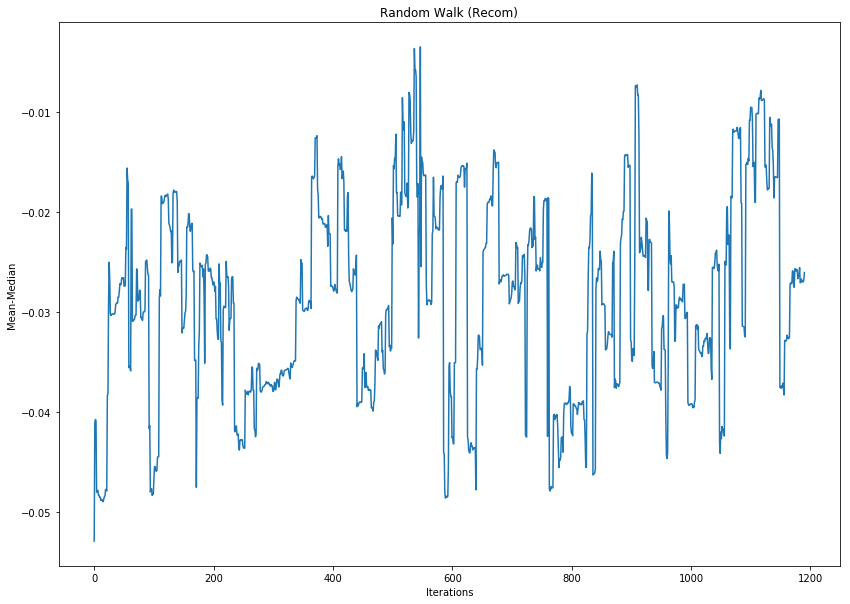

In [46]:
x2 = np.linspace(0, 1190, 1190)
plt.plot(x2, m2)
plt.title("Random Walk (Recom)")
plt.xlabel("Iterations")
plt.ylabel("Mean-Median")
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

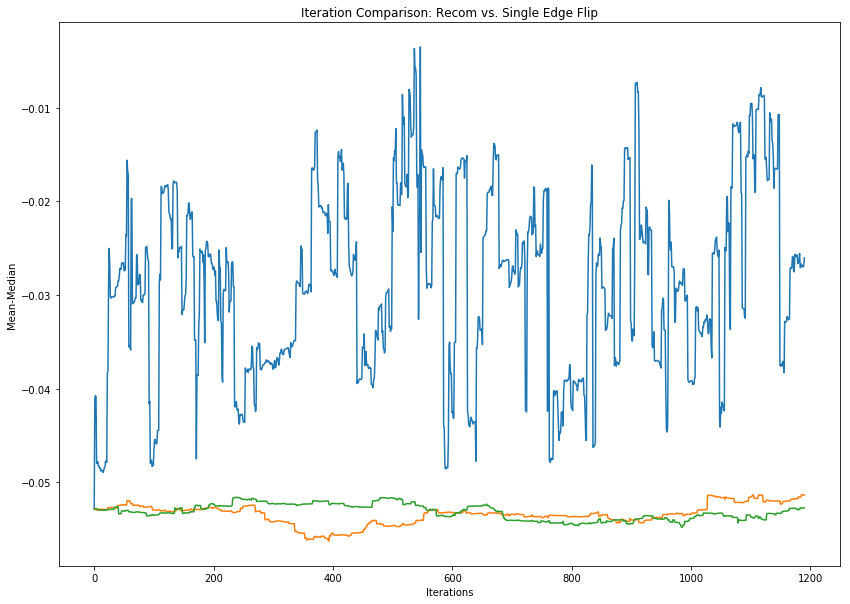

In [57]:
plt.plot(x2, m2)
plt.plot(x2, m[:1190])
plt.plot(x2, m4[:1190])
plt.title("Iteration Comparison: Recom vs. Single Edge Flip")
plt.xlabel("Iterations")
plt.ylabel("Mean-Median")
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

In [58]:
m5 = []
i = 0
for v in m4: 
    if i%42 == 0:
        m5.append(v)
    i += 1

In [51]:
len(m3)

1191

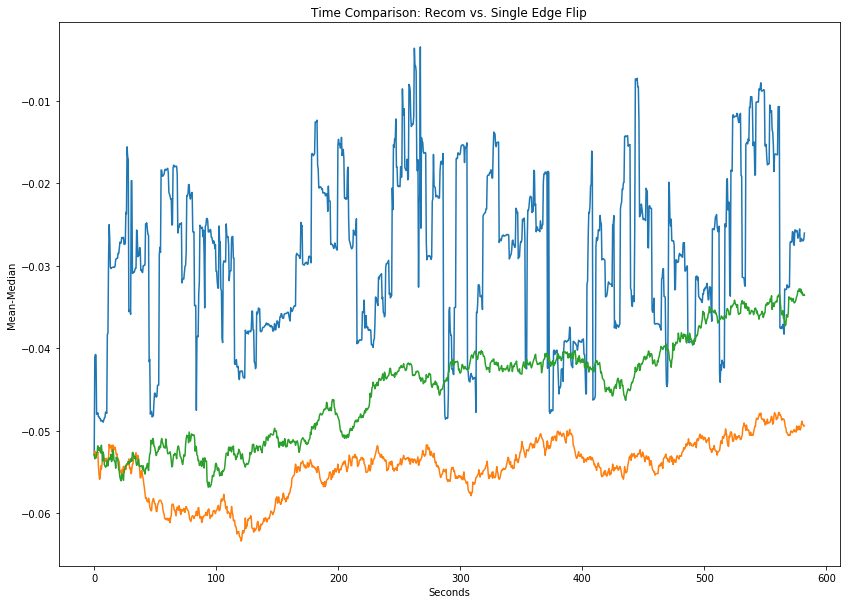

In [59]:
x3 = np.linspace(0, 582, 1190)
plt.plot(x3, m2)
plt.plot(x3, m3[:1190])
plt.plot(x3, m5[:1190])
plt.title("Time Comparison: Recom vs. Single Edge Flip")
plt.xlabel("Seconds")
plt.ylabel("Mean-Median")
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

In [113]:
def pp(plan):
    polsby = polsby_popper(plan)
    popper = 0
    for i in polsby: 
        popper += polsby[i]
    return popper/len(polsby)

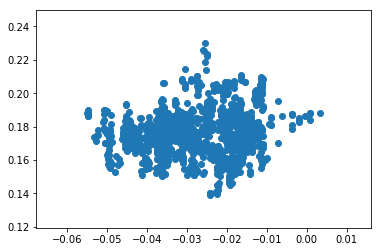

In [90]:
plt.scatter([k[0] for k in points], [k[1] for k in points])
plt.show()

In [87]:
points

(-0.037187770469092496, 0.18070286328019164)

In [91]:
buckets

[-0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01]

In [92]:
cbuckets = [0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21]

In [96]:
def cbucket(value):
    for i in range(len(cbuckets)):
        if value < cbuckets[i]:
            return i 
        
    return len(cbuckets)

In [160]:
d = {}
mat = np.zeros((9, 9))
for i in points2:
    mat[cbucket(i[1])][bucket(i[0])] += 1
    qprime = bucket(i[0])+9*cbucket(i[1])
    if qprime in d:
        d[qprime] += 1
    else:
        d[qprime] = 1

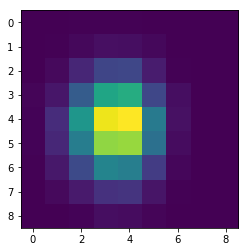

In [163]:
plt.imshow(mat)

In [150]:
print(d)

{37: 616, 28: 300, 39: 4748, 48: 4054, 57: 2206, 66: 693, 67: 738, 75: 175, 77: 62, 68: 282, 58: 2080, 59: 865, 69: 34, 65: 360, 60: 90, 49: 4123, 47: 2073, 38: 2551, 40: 4872, 31: 3025, 29: 1422, 30: 2866, 33: 174, 32: 1045, 41: 2006, 50: 1798, 56: 1092, 23: 376, 55: 321, 46: 537, 22: 1034, 13: 174, 21: 1022, 64: 117, 20: 517, 42: 227, 51: 164, 76: 162, 12: 205, 11: 104, 2: 25, 3: 33, 4: 28, 5: 13, 14: 99, 19: 126, 10: 28, 24: 20, 54: 28, 74: 53, 73: 7, 36: 54, 43: 11, 34: 1, 27: 67, 45: 53, 52: 5, 63: 3, 1: 5, 18: 16, 9: 3, 15: 4, 16: 1, 25: 6, 78: 1}


In [155]:
sorted(d.items())

[(1, 5),
 (2, 25),
 (3, 33),
 (4, 28),
 (5, 13),
 (9, 3),
 (10, 28),
 (11, 104),
 (12, 205),
 (13, 174),
 (14, 99),
 (15, 4),
 (16, 1),
 (18, 16),
 (19, 126),
 (20, 517),
 (21, 1022),
 (22, 1034),
 (23, 376),
 (24, 20),
 (25, 6),
 (27, 67),
 (28, 300),
 (29, 1422),
 (30, 2866),
 (31, 3025),
 (32, 1045),
 (33, 174),
 (34, 1),
 (36, 54),
 (37, 616),
 (38, 2551),
 (39, 4748),
 (40, 4872),
 (41, 2006),
 (42, 227),
 (43, 11),
 (45, 53),
 (46, 537),
 (47, 2073),
 (48, 4054),
 (49, 4123),
 (50, 1798),
 (51, 164),
 (52, 5),
 (54, 28),
 (55, 321),
 (56, 1092),
 (57, 2206),
 (58, 2080),
 (59, 865),
 (60, 90),
 (63, 3),
 (64, 117),
 (65, 360),
 (66, 693),
 (67, 738),
 (68, 282),
 (69, 34),
 (73, 7),
 (74, 53),
 (75, 175),
 (76, 162),
 (77, 62),
 (78, 1)]

In [111]:
for i in points:
    if i[1] < 0.14:
        print(i)

(-0.0224955557068256, 0.13941006581281107)
(-0.024304641430023866, 0.13907875181588217)


In [130]:
np.max([x[4] for x in points2])

0.14828447854994037

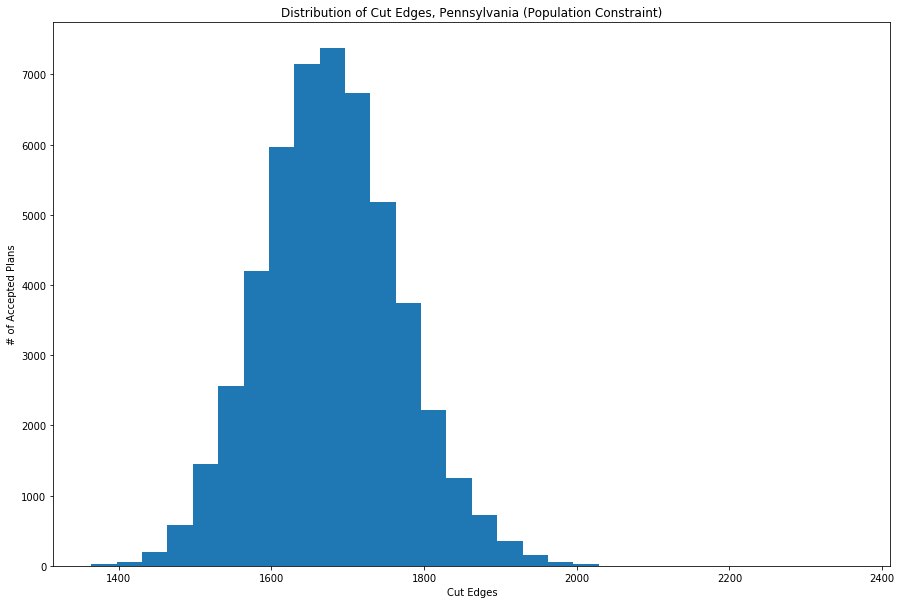

In [143]:
plt.hist([x[5] for x in points2], bins = 30)
plt.title("Distribution of Cut Edges, Pennsylvania (Population Constraint)")
plt.xlabel("Cut Edges")
plt.ylabel("# of Accepted Plans")
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [144]:
df = pd.DataFrame(points2)

In [146]:
df.columns = ["Mean-Median", "Polsby-Popper", "Bias", "Gini", "Gap", "Cuts"]

In [148]:
df.to_csv("PA_NC_50000_20190630")

In [12]:
df = pd.read_csv("PA_NC_50000_20190630")

In [16]:
points2 = df.values.tolist()

In [191]:
test = np.digitize([x[0] for x in points2], np.linspace(-0.06, 0.01, 8))

In [190]:
k = 0
for x in test: 
    if x == 0: 
        k += 1
print(k)

1


In [267]:
mmrange = np.linspace(-0.07, 0.00, 20)
pprange = np.linspace(0.13, 0.23, 20)
bias = sorted(np.asarray(list(set(df["Bias"]))))
grange = np.linspace(0.03, 0.11, 20)
egrange = np.linspace(-0.2, 0.14, 20)
crange = np.linspace(1400, 2000, 20)

In [268]:
mmbuckets = np.digitize(df["Mean-Median"], mmrange)
ppbuckets = np.digitize(df["Polsby-Popper"], pprange)
bbuckets = np.digitize(df["Bias"], bias)
gbuckets = np.digitize(df["Gini"], grange)
egbuckets = np.digitize(df["Gap"], egrange)
cbuckets = np.digitize(df["Cuts"], crange)


In [354]:
def heat(a1, a2):
    matrix = np.zeros((21, 21))
    for i in range(len(a1)):
        matrix[a1[i]][a2[i]] += 1
    return matrix

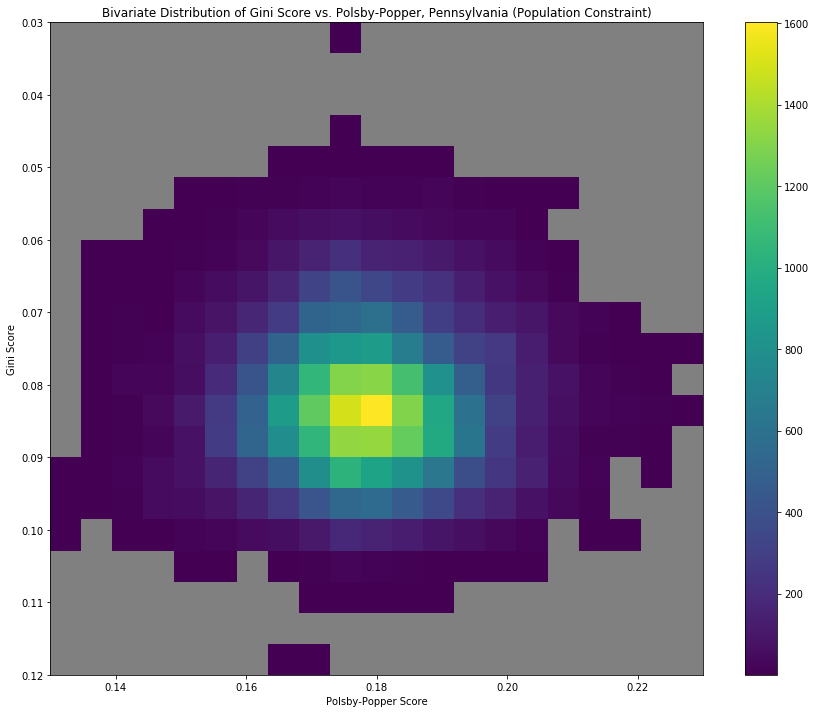

In [366]:
plt.imshow(heat(gbuckets, ppbuckets), extent=[0.13, 0.23,0.12,0.03], cmap = cmap, vmin=0.5, aspect = 10/9)
plt.title("Bivariate Distribution of Gini Score vs. Polsby-Popper, Pennsylvania (Population Constraint)")
plt.xlabel("Polsby-Popper Score")
plt.ylabel("Gini Score")
plt.colorbar()
fig = plt.gcf()
fig.set_size_inches(15, 12)

In [220]:
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

In [291]:
cmap = plt.cm.viridis
cmap.set_under(color = "gray")

In [311]:
sorted(np.asarray(list(set(df["Bias"]))))

[-0.2777777777777778,
 -0.2222222222222222,
 -0.16666666666666669,
 -0.1111111111111111,
 -0.05555555555555558,
 0.0,
 0.05555555555555558]

In [353]:
for x in cbuckets: 
    if x > 19:
        print(x)

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [367]:
points2[0]

(-0.05288069247284355,
 0.17121345727320145,
 -0.2222222222222222,
 0.11064380503104,
 -0.07176053351222789,
 2361)

In [383]:
p1 = pointsmod[0]
distance = 0

In [420]:
dttt = []
for x in pointsmod[1:]:
    y = np.subtract(x, p1)
    dst = np.sqrt(y.dot(y))
    print(dst)
    distance += dst
    dttt.append(dst)
    p1 = x

1.3098768427439824
0.0342117570225298
0.38892604210064424
0.1548082878353646
0.09147648388769669
0.19865643822048665
0.04620924232428882
0.18962012524476435
0.022325176993886586
0.11714670234509598
0.02630295276384381
0.13132442947025147
0.2538507339611927
0.07078117995254374
0.10033280281277737
0.38378016482293065
0.1677397874602693
0.07607525900851933
0.036488753219195924
0.2202739776107079
0.336477741672091
0.16186537279852406
0.0662267791093388
0.19222021039897955
0.20821235336523636
0.03282863590512444
0.17077043688612814
0.0734796286823794
0.030515986930237358
0.2773818893700135
0.17558873498146782
0.30538258110750427
0.015851161741117194
0.07087712018489681
0.03338437449771733
0.04769250807057667
0.12020442580792892
0.39070950558208356
0.06588309970327141
0.25672832582440785
0.39094156154381415
0.005453262858144653
0.25053506306887935
0.07388141813003063
0.04155911806832335
0.19304759580933253
0.27711707980910133
0.056427575700551146
0.40077701664341314
0.0028140636200805003
0.0

0.048858420621305715
0.0505753228734678
0.005206738928269125
0.2515304526238277
0.026025245524169214
0.11410552108410783
0.026548733356663436
0.0590403851483912
0.04710739615559731
0.03402508286775231
0.05288433019251916
0.011907430681253526
0.2715370280799741
0.05450580272937637
0.011997239863046785
0.19093513108272753
0.028341013455623537
0.18679274588626743
0.03745168492869446
0.08404917503312152
0.04929533480133431
0.10819674887688421
0.026647088212306956
0.03086788664345798
0.07061891469264907
0.19160647954409374
0.007980902587521179
0.20098753155692295
0.016053125136768723
0.07000871849636665
0.09614228978446385
0.17461019471307768
0.14146561855173378
0.059241230561459385
0.009312682804038472
0.03851786245809877
0.1041528830999099
0.048321796843499486
0.03485361577475351
0.03866994163531258
0.04467031220836395
0.0712362080121386
0.055064047338921236
0.006518738464555431
0.18079753520093206
0.1840884425666138
0.01821303020690608
0.03327936140252685
0.044727248469486884
0.141668077

0.026850839140446593
0.09350314446450958
0.04168253496335559
0.03997965826562863
0.024525150741824427
0.14612083652634095
0.0796674937178091
0.06535129725508265
0.22996200941326211
0.04203276893506919
0.030142654360536272
0.09806609512282326
0.16911898667083747
0.20922155027752085
0.01418114197605837
0.16960273914273916
0.020399861739735733
0.03164740927862764
0.09572846447866983
0.010697405505664222
0.229176902211614
0.09943109148135766
0.02035233603997132
0.11409270912991555
0.03134947866314717
0.08349399317442223
0.08001703501499495
0.1783703848278664
0.22283268634338932
0.0457593432623571
0.15040615984406305
0.2142887771609193
0.12510647218919474
0.00809975475084856
0.17171600070258086
0.1152997575728444
0.2782602668524656
0.022594195711881853
0.06893354253237409
0.17528864563214244
0.03339492519851078
0.09227037083639453
0.055097374391750914
0.12889872469408747
0.02720846584464866
0.018187882199569474
0.07691962379408127
0.1770483647751087
0.13516395467146633
0.04622674691043731
0

0.06516084286135626
0.06340545007601633
0.3013727278248015
0.1685562515800519
0.17051366664136314
0.050042954355992084
0.16403324192018376
0.06377748582072341
0.032032833617473944
0.030113451551425956
0.0988789452130385
0.14030210307526272
0.10890003304806337
0.06148648579016151
0.24191062565551555
0.06428708018334066
0.07896224659007461
0.038012570154988136
0.06981836964838731
0.05060041707177311
0.048305692590862724
0.16847627189756487
0.10139596828263595
0.03974128833580414
0.08124059754855804
0.26348031896941443
0.10865511936493198
0.12329233244895679
0.2032836822854356
0.011592887626760359
0.07118811738194528
0.00926778983370535
0.06393108246763453
0.020464353340617275
0.023129779946285043
0.04711048023838666
0.199363280433179
0.23945116197345798
0.02273405112951751
0.08246032393799108
0.08388888140021276
0.05563727060553284
0.23702861917730958
0.1903710749065652
0.27167351300234016
0.17711340605510079
0.07044753976952906
0.05909611367975001
0.006232042114242401
0.2256903104255687

0.05404861989738279
0.1691464699168814
0.17046438913060638
0.036916413719521715
0.03928535806668114
0.04014138953603847
0.041538822627310436
0.08026416517380823
0.009950555479459137
0.04516069984119766
0.06008236861917817
0.061110714249958134
0.05303700867673876
0.06249035810022324
0.028435964409304793
0.17336319418120436
0.06727841090470146
0.031903111138349656
0.02699773414993881
0.05563315379415356
0.01693873187674672
0.002611546328405691
0.17608171811968945
0.3091291850944423
0.025806178397454742
0.17844954712603497
0.029863616125232195
0.03552146335264949
0.02957364633805156
0.0481652550983793
0.07897416949135877
0.01788289445604253
0.03955921239972555
0.01148374882043097
0.21135733157063774
0.017269925934848638
0.19438558946089166
0.0540215475444438
0.011145424695648757
0.03924890674693884
0.2132641349454917
0.04358209650732965
1.0824674490095276e-14
0.1980945900447395
0.08361617244185544
0.00509692649488848
0.0511811111342481
0.03589090037213728
0.04883495761793224
0.01586262386

0.17972838954795942
0.16956845712609125
0.21792209406130272
0.030810006047639428
0.05907580841566076
0.18426349830757763
0.1670557391754847
0.16893210736536526
0.17019678346231024
0.1676426076795278
0.02270063576269583
0.39864230858691513
0.09187277413481239
0.05211098440201109
0.1982113101077318
0.0936619222966147
0.08764809939318255
0.062263453427082165
0.19610589215112112
0.03918331618789987
0.13862431056564453
0.17021333237531544
0.1673530747238645
0.1755422529251053
0.037453661196500614
0.020662851082052333
0.11539295680548885
0.10804347084363303
0.17022064905310627
0.18613253186903986
0.13126394653962206
0.023683099542501918
0.3159153596405471
0.016754309257766234
0.026772011110210187
0.03165171316916527
0.08695298131086886
0.23288585753953395
0.13801314546694018
0.01729364606205809
0.020924284038492308
0.17086454310279697
0.013005850504697342
0.035546688440589155
0.16779849236355202
0.022710430930818787
0.12594964369321782
0.060405172090374125
0.019342588222380053
0.079548025192

0.19546442826357657
0.22337516919564945
0.22902399158985334
0.07398340561520013
0.1054735099150821
0.11375832797420012
0.07241657396782361
0.07004140343762792
0.053301960391321596
0.07173679059885629
0.01694113982841214
0.02180089127608001
0.035595893254999136
0.007585656978929497
0.018796262341706133
0.0
0.07707203411379294
0.04218495214246068
0.03896396376841652
0.045684787384376396
0.04389444179807251
0.04796220959354704
0.03143031013421631
0.0273128919634588
0.07368322435211924
0.04732968810461466
0.16722285226188222
0.06438812892704182
0.061860918397532695
0.05823859428967514
0.06176306179687535
0.06423793398516123
0.026025835052262487
0.06463948086437898
0.0334497527038179
0.19134957201701103
0.12044102931574321
0.029986152639908965
0.10325076797356075
0.12125219258125805
0.024396897004590003
0.04690904236018085
0.013813317191388693
0.08905283308379658
0.007039333176438014
0.03979897055057719
0.06239634958733988
0.07878519578039431
0.05906589525791032
0.0589865644637152
0.0271146

0.004723391824603404
0.16468496324657456
0.05153239716630539
0.05509207801537603
0.1724332775853516
0.05188299000662186
0.06297676789361935
0.22890770958262682
0.2543529034991174
0.03168727890559916
0.055978919885970306
0.1780988002070816
0.08835908584172723
0.02487862239856941
0.18616338231819074
0.09348411656528836
0.01699418004866653
0.07199332380294489
0.02873587594280309
0.17490155680275565
0.02639449261781296
0.01919528796093143
0.2968300867182945
0.042871735435141355
0.03382030173495067
0.052160655402877946
0.15995322307048213
0.017930925941568327
0.03322558783412533
0.018304995782686382
0.10721789699573933
0.0723124884980805
0.32557514715257574
0.05537186526263852
0.04448099294053256
0.23017826650171608
0.020530748693461682
0.031652248215496274
0.17406332373403896
0.06044339465726704
0.04227802953699349
0.020214952019842605
0.02834550656183687
0.07145956666760608
0.04468176679969391
0.018058577914952523
0.020247585727015998
0.0692097627126142
0.04111235279389772
0.0421780581855

0.19111235424730266
0.15717433785126517
0.1746388036524967
0.01724997979357618
0.01791037370191465
0.018226417612085433
0.05700297223164382
0.06017911439149277
0.17760697959835772
0.18114503553921316
0.10906096830230286
0.008351514685375766
0.06307615507147313
0.22402060143301322
0.03334120689961511
0.09866611063826042
0.07409517888155198
0.05136725505929693
0.055555698883419116
0.05649605953326083
0.41504126253332213
0.08042562178366439
0.02811230953642343
0.2892698378371121
0.07754310171507786
0.02414021852771048
0.11373806552740522
0.1197230661513571
0.012796612857076067
0.20351158181467488
0.018825106619113074
0.05929399941119755
0.04572083181175195
0.16929871926618043
0.011673428596934788
0.015462151843821987
0.02188299941534946
0.018886245276022135
0.26436948453473136
0.06617205690556331
0.024433065531564935
0.05709332040910485
0.011992821560082198
0.16856027292739253
0.04689759611435249
0.06588583829002527
0.052584480605823304
0.008135065552462229
0.12700512186135757
0.027170764

0.029625882717863296
0.1783093211088708
0.0452737693647554
0.07346020685948958
0.04892243679665741
0.06202429994104798
0.015037622252360227
0.08996144586038687
0.06169271960462813
0.04577811451911077
0.031774473708863
0.012381607784510258
0.07361084781265548
0.17656856548320243
0.18028573985232327
0.14511754807878008
0.02318475651666
0.12119980215531805
0.026232586868673007
0.17201738508470993
0.07154617812004276
0.08081579243478423
0.32340449117751086
0.0975437986585392
0.1921041441073116
0.11898842928912466
0.17091988119509385
0.03285342232087508
0.07761455661082295
0.16964181285674135
0.05291512637289184
0.33626890153638345
0.042758197564336776
0.056789400441368244
0.19365339812534377
0.059058194058303565
0.031389791369412175
0.03499080282696951
0.13541849192271968
0.18955659482541184
0.04161742651624529
0.09131222064944856
0.07525929275815313
0.054594973886777864
0.06641389927987998
0.1237959348128117
0.024403140657086767
0.06209823353231825
0.0463076091017419
0.029945478298994
0.1

0.17735497400821998
0.0469232969889289
0.21087758807584794
0.008644703077257905
0.06697296489006276
0.03449375203787402
0.07945891035074663
0.020247871731129925
0.07072251666655198
0.2387895032701309
0.014180028474619646
0.042674438127737274
0.06001355939956899
0.0924954408813206
0.052764586568497494
0.023922526465495527
0.03683539486031584
0.06322344660609874
0.018021684929058316
0.03332183635107213
0.08578049659010915
0.018040378990597784
0.05289344464060133
0.04004369002019037
0.043665325054350904
0.09313829217723524
0.17585609384013573
0.033347189769492976
0.028389182096285423
0.05110099870041605
0.030190789781135225
0.01031475604751911
0.033944006381629546
0.018535958429654154
0.038730408463052445
0.06086668621452781
0.1677436894686095
0.17639798296818582
0.02452958647500119
0.012317886552602715
0.048306581279648014
0.1861040841423813
0.026207154618282474
0.20478189577547282
0.0424276945182716
0.0
0.010788291255819163
0.2314962306563587
0.00980149799140838
0.03531147790026853
0.11

0.08554266926687949
0.0371240567629661
0.04058360664770464
0.05976369254506739
0.11520514755524836
0.15763111535004706
0.009101310167641572
0.04021720936506025
0.17508147921564732
0.031781821421651923
0.022560466426699365
0.03508788683538119
0.017342013029541647
0.039536272149799066
0.14759685652338364
0.024840375207700983
0.11165042874388596
0.023854178709466115
0.020890093424571165
0.062352793631254115
0.05653583400467795
0.09083835227677878
0.0309805900582901
0.1418346223528647
0.04985424273931114
0.015235529769966984
0.16803160357579183
0.3280311065032798
0.04142567730500473
0.3594341968592772
0.0564594152700473
0.15423500103967766
0.051271739895724394
0.08846707987655421
0.21200611414988266
0.14004395537974504
0.07932146012868084
0.03475739990232245
0.03066019447577821
0.062099223195328415
0.04870694267391592
0.16868733158678256
0.03526940258410375
0.09128048991894773
0.18280971417676312
0.030742159096318736
0.017527458944062487
0.038992889901440765
0.007675764425175654
0.08856140

0.229365013184123
0.034275322521496204
0.05426713089121241
0.040851360569191524
0.050438270404834395
0.033854824560075915
0.09041781983066349
0.06914954459666192
0.16876908679636643
0.012037694691963153
0.01459414367259457
0.037343463127211464
0.04535483960856502
0.18532557716721498
0.03051180100357778
0.02580301830340431
0.28405960476820846
0.19557495732194322
0.07633773425482611
0.21533094407411105
0.08180791192039896
0.0025471063139850436
0.08064869767364276
0.08140133226501996
0.058450340097123486
0.08599668117297603
0.0388831172911398
0.09769022929998891
0.07776749508894212
0.016466748974172826
0.17549115410751734
0.15922752849045646
0.17186384701084148
0.0651024386603699
0.2215440857699643
0.02939795752290625
0.04964207962117007
0.12724706401198482
0.375438540814265
0.06330807957983571
0.187006307976648
0.12565783272347233
0.0758016777605976
0.01867750850943263
0.044566928168508116
0.06105674908988909
0.06472688136331706
0.30914586936903543
0.04522851230097971
0.04758474579382905

0.21657499085563836
0.10365585778619982
0.01895979763209366
0.0065614077823862435
0.2930179857338007
0.0672770199407878
0.16278775618841684
0.16894963859682352
0.014962555704240614
0.08208266937884452
0.08692382965639499
0.07857937278039548
0.10199317310885275
0.02184147494407632
0.026186247419471696
0.1892423661421494
0.057198251916503955
0.018228129645677958
0.03111398111936284
0.19060560580360897
0.07280702747099405
0.0858820966954276
0.017998474956475982
0.05869879711013529
0.22573887091363468
0.07721119056131936
0.19989105407352256
0.08613645364884194
0.05807903896494712
0.1824276317682144
0.025850172628627734
0.15377413801647283
0.08084794414842843
0.0049884438769931295
0.2819839952265086
0.013765825924145637
0.027309682164977003
0.047830891447263144
0.025245263927187938
0.06301498603822395
0.08955038573502298
0.03249242250709533
0.03382082543967204
0.011690971131565201
0.060053408081670305
0.009047938720577516
0.2511819610295613
0.025913843723730227
0.07391799942661594
0.0686803

0.032073987048627906
0.19238546246992827
0.11972926484005496
0.05063107863890982
0.020322821689450928
0.29463190188160576
0.0749568159801228
0.0031335456286180727
0.021452129510024245
0.016125593865359927
0.18640177742152195
0.05793099234296432
0.2414560933374359
0.021378100391043618
0.2649064638648252
0.15554702773340173
0.060234434443773625
0.06392160142068769
0.03619958371883741
0.027266986207587218
0.023941396900410587
0.03964440380693632
0.01803057417628173
0.10298593243111301
0.08582445667106023
0.043164273267523146
0.06863680546353329
0.016167367915694026
0.027055939733564377
0.2445028397682839
0.11918588967435999
0.03522817675141815
0.10480025254035018
0.028937353115582265
0.12510315106611286
0.06919882412464778
0.07635540022065639
0.03644114260618112
0.02237579987877747
0.09048651093805113
0.2346697931396962
0.09278460817575424
0.18796724221459973
0.09438811299606752
0.03600520420989279
0.017121390805636558
0.2437710082331316
0.06295028195632982
0.03732406767720726
0.069498003

0.04049201579383633
0.03895102060393565
0.15151221697544756
0.0840573005904642
0.04053057452135324
0.0562057058145444
0.037582842144343404
0.07222210772412002
0.07144604962704718
0.05576677443996724
0.014122414955227704
0.08886432727228173
0.051941085323825575
0.07871148413782414
0.1120185860186711
0.08268693214067727
0.04212848154988414
0.1308991183126451
0.2987632604296855
0.12094169752020331
0.14116629533075992
0.029421352713905138
0.12063372912898461
0.08973552851683732
0.06092367424821686
0.21411793617234542
0.16977121590114921
0.05418377361819367
0.030913167534186065
0.01757680715027279
0.3183866109754589
0.13887090024907323
0.13435951588030579
0.08678908575882528
0.19260352830598582
0.1952562502146504
0.07054253021729477
0.17689736181441607
0.043141285697533144
0.33267992461179885
0.1584314851675389
0.0661202454309485
0.015194797831279272
0.025532541618130556
0.05964609502180388
0.06373837801232572
0.130303050988892
0.016307167987248468
0.02275530383225008
0.25335168251695517
0.

0.05907097193670966
0.07731633715924341
0.19318193521411925
0.25668781489097564
0.050895346535019974
0.07509430590193608
0.08685447474308648
0.06690215272121446
0.013628785064753778
0.09970301062565541
0.09993392962400918
0.009501422308585717
0.12242760299836704
0.04935073786399423
0.2313055034640302
0.2072726760120207
0.009145460476256268
0.028056541197743347
0.04409081323528274
0.10557017129807432
0.012815860766012436
0.012269510569055692
0.05612296941515718
0.12675590084592755
0.22689422511741478
0.13789661566957123
0.08289993804429896
0.011717212042864298
0.2134690431698764
0.05373503682832695
0.22924718027567084
0.06947287464592675
0.018316111151558484
0.05695291875774043
0.037321656207508665
0.06782166407371909
0.22562570066207163
0.07194515923548027
0.02298691772822707
0.4679885040265413
0.08789127703060967
0.021808015756100644
0.03486396077094922
0.014549288319061918
0.218826781091312
0.11154686778732566
0.035996335274967504
0.5277007650619469
0.01835266140097796
0.292088579271

0.02177011896273579
0.024266720199842797
0.25892290423817327
0.20259531792452565
0.04317125130335031
0.05025946529107885
0.047875348423592784
0.02013928629988954
0.22800051582823705
0.042934810652371
0.04544982951065156
0.23338289366750034
0.22691084944977313
0.06133280015560067
0.020306515051668337
0.03858383121481085
0.46253825555439265
0.0655246105508142
0.20732909872405642
0.2263052528541132
0.17334018733595244
0.09142559774253001
0.06771676746030673
0.17785463192456857
0.03460922911576646
0.014938381233947666
0.040954499553366136
0.16992507906217325
0.33554908790828303
0.07986626153950904
0.050679545959986055
0.06745973094493993
0.10218863467920881
0.06986031714651704
0.03425522223520857
0.09435561188658088
0.022298900431453515
0.02502549958387984
0.0684920542505538
0.12208189067801795
0.22664119718366388
0.0446423630916749
0.08491851728790355
0.04995623123372232
0.428898892656816
0.044950613549302625
0.0926361294199455
0.02937785432178494
0.00933347487518773
0.06062669003157299
0

0.18001495199708442
0.022965791340417558
0.17895075939134034
0.02506063463630916
0.017427468486273884
0.16254169317051193
0.15710573837348427
0.03842583475784918
0.07640986318389123
0.055373479000092894
0.06519067047946099
0.03397104743688677
0.10519088704505256
0.030898932965280353
0.25997843255216346
0.023711829925915247
0.015966380237445198
0.059855032512114076
0.03024885208872102
0.05881245125405792
0.018343112585757087
0.18170184309941767
0.20415812351425364
0.047615846929894005
0.01402505089809223
0.22265163478758826
0.07578577309438597
0.026066301984044596
0.28323037947617935
0.014881219072529728
0.04320760307873521
0.03508399477300846
0.0546627874954347
0.17797358486193438
0.16895940254661065
0.10860481284426003
0.005440544641681068
0.017055096159521065
0.015620910071921484
0.011534001254589525
0.02602538978697921
0.0616458729511986
0.19459161493700727
0.05724923810143136
0.13313771981455746
0.17673963470308687
0.036215516392929616
0.022548457379858607
0.05484539285605352
0.005

0.031814006582237445
0.28064249665674623
0.04761042044333924
0.044107437267516564
0.01237647151019723
0.34131108822793865
0.22191592070617647
0.07478662161814151
0.0630555274648633
0.0390886689236301
0.016577920633552914
0.2616869718974909
0.01907917468694177
0.04514887906096555
0.09617749298862951
0.08869404372811203
0.08546123748632369
0.21552002450074806
0.009943352077662549
0.303855856504143
0.059069504502913824
0.12252392048382817
0.021324049129220722
0.280238749853532
0.034186112059072966
0.0328056828756858
0.03905325578402615
0.05873385948210873
0.013843400475275509
0.027287064235492035
0.03887917693713517
0.016453040866318654
0.017486547976313577
0.03903991328444969
0.02205126876625677
0.13712532632508892
0.04022010661229626
0.23840963670364448
0.02320025144488956
0.04575565844124454
0.21031501481729611
0.1701928288606962
0.015003157887413392
0.09133022379654814
0.23956960779955971
0.20625059963921494
0.08156706251648604
0.1681827945597611
0.06325789139259308
0.1698708643341558

0.011965162885020518
0.09044737120602858
0.009172999788884808
0.014669127991776495
0.020162545762595244
0.19028140556168363
0.1430676004325501
0.06982914241514453
0.10424448784223196
0.07116027305381364
0.021988501060482096
0.14739093224987126
0.04713829281071239
0.027864543087363105
0.09718834955848876
0.06663703744076573
0.10135059917917313
0.106623584182926
0.012995666796052999
0.030102371092048386
0.08640766727208452
0.010520459379484884
0.05226715684508153
0.23777725222122617
0.03434622090435547
0.10164797798031447
0.03702986433016107
0.048082894407979714
0.20698161390696979
0.06955258195281494
0.1786565266994542
0.04666330262837612
0.11032598948669406
0.02232885317706849
0.044035059287502516
0.08688528171362771
0.1856512669156279
0.017875234384364884
0.1608813530692733
0.0053310890828411756
0.03193926722035378
0.09980695364751156
0.006257372591282755
0.03086197848840514
0.01387681913356574
0.02019729610839645
0.10451522045136229
0.06481517382612373
0.04214333208407798
0.084446576

0.07091314115516162
0.06431266364603788
0.18104220097899293
0.06118768962366559
0.021736095843109843
0.032401635481148314
0.1201671521628202
0.07987530572481419
0.020022237598227785
0.0658586474405897
0.3068539982820416
0.08302762347463358
0.1474702492555004
0.23169786051985716
0.030765695797731293
0.08688571251511126
0.048039703145495154
0.03909386603905893
0.01888756456030835
0.09567298690065146
0.057812320563496944
0.015295420683483725
0.21257693752000623
0.10022067384596693
0.07904664736280882
0.3042354168605166
0.013557864776366606
0.09323162660393877
0.06406989358816863
0.11436661840328788
0.06327772331311694
0.05178670360041402
0.058395241212071555
0.05698935689481492
0.05084359872822767
0.06379989418523989
0.2789071435073733
0.016364568688707677
0.08745418455283155
0.11806356760648051
0.04133848465435126
0.05348653881119378
0.04809766984477305
0.041505621242922765
0.07838806655612726
0.008553900619547642
0.0667548663102247
0.06806734064286747
0.17569187798398198
0.0401975130897

0.035909468027946624
0.19016021840242045
0.04826599703120741
0.09805187748047188
0.10524449931768576
0.17526581430693053
0.042494252129201424
0.06008101526806317
0.0174491254714704
0.09341610447699034
0.10228530295136373
0.041200251525452175
0.03428773955333479
0.021446367988180403
0.03764608851624538
0.022872888214997132
0.026595621432710097
0.11258257068536734
0.02131804606377858
0.07280917502495296
0.05455152910766979
0.18024150307027226
0.009766217332732561
0.2206326946272045
0.014034491935028494
0.04264045868975503
0.19593299516967944
0.204199313767643
0.024053715244846535
0.18188064950388014
0.08251810518098888
0.04133500393451442
0.06156063748598366
0.037777400551319035
0.07333317213700284
0.16265606772585417
0.011259332039798155
0.041303916598228706
0.06411622937513867
0.20800566500064696
0.004788194426484461
0.08758459843173304
0.227271470670249
0.07352666151600842
0.008364009535051434
0.038175720821366034
0.27613032779335417
0.18576196716981994
0.041495083808302816
0.18954521

0.03413370241660967
0.04538785440087935
0.031039228664763104
0.0188485028745947
0.4481086060819092
0.014840537475466204
0.036929710674689906
0.03494100568128316
0.12372620162271349
0.014293389718247118
0.023591224331667656
0.028114220994710542
0.22520030882693362
0.023209389587095106
0.051526225714711334
0.13184589410740938
0.020239833389432853
0.023179184377994242
0.015373180792556389
0.0259933881403856
0.07337184070137724
0.05621259633362263
0.06585357321572076
0.01853606726651533
0.09071052387264797
0.027495354942024965
0.06976487532654783
0.07781944908414201
0.006661356315363808
0.04013121735029687
0.07810098987886131
0.02366269485495199
0.0654674043306951
0.023226854029487324
0.2220834286706094
0.06176082096528414
0.0791884085677691
0.09162461353185118
0.04234998007266302
0.05893516004558086
0.056463025845335794
0.0799618877092329
0.03706350134950399
0.014207642241824253
0.24875317962942617
0.005924256720916591
0.13603821077384595
0.010751791598852084
0.02198677928098772
0.1376590

0.03860561844188152
0.2327254067670352
0.08528020517474244
0.049055181230165855
0.05413335111927207
0.06518630394417917
0.06999706880102871
0.025995703722593654
0.04073340172830593
0.022697642958078957
0.01570340931114315
0.027676355510682978
0.01726908448829307
0.048539689814363685
0.04442414711187137
0.027628501305321174
0.048552080752660876
0.1707449469227435
0.05445840182916603
0.08452844635673315
0.06080209394202983
0.08929676700479797
0.18315465823351657
0.10828966764367752
0.0505048852981657
0.20694075259412498
0.21363629441177265
0.053582288736286246
0.06463329183753568
0.2261561739255124
0.006858770475364748
0.012829512091360198
0.025316414956637997
0.020629465188795607
0.030060619580151833
0.22071662531327052
0.06860320579034244
0.004033235257795877
0.08849789641671098
0.034421421395093646
0.03266399074991908
0.04201147759831871
0.0121413467160175
0.08728820910921598
0.06420560151922655
0.03574422312983098
0.021245690498905134
0.08261707374144331
0.030182593718150595
0.011338

0.17860150564785401
0.18620243082577023
0.04827264200645713
0.036260745302464446
0.05960554427783248
0.03621886996045355
0.010855670717258866
0.07878956176290274
0.05498861045634324
0.047428853075915205
0.08246546139256321
0.010873787858683138
0.12850758105200755
0.03240203140416937
0.014360363961734944
0.01565384609942976
0.023535566522740282
0.2710647795702355
0.0558207315497856
0.05295329292965212
0.08605463741673727
0.07798703890639826
0.011521143053611948
0.010877877767246408
0.08643347665560068
0.15968676380184538
0.11358213293184102
0.23262274301541075
0.008863242858482251
0.05635784863056515
0.05114226035590238
0.16666708443365788
0.2755005000848274
0.06508372763842035
0.03428353282517218
0.02348754300852285
0.2523881872870175
0.1676320153747741
0.025894382784037384
0.03436204404491318
0.1046178736827668
0.15748377297959348
0.014108888288722374
0.1395277456762033
0.04665287093468923
0.17864179042992978
0.1674369399611832
0.15621904963968505
0.040241090393555314
0.01365898650786

0.1868448850252866
0.2446980067230855
0.03639525126243196
0.02911785513705995
0.03291799763330758
0.05291960120237449
0.03592680705076318
0.04032285592659608
0.046398933392578126
0.009736537765861236
0.02333698649917474
0.08346210460632678
0.015353546601749694
0.03703229800987226
0.2426929392349054
0.21973953810687555
0.09755406677725541
0.2877633593170581
0.08196925283859459
0.2672538562488129
0.049149829005898704
0.1751386743386538
0.026381009487957047
0.045111711122451714
0.0803247096521066
0.0035151662859522256
0.19367873675448713
0.0022956067713839658
0.15510419144712997
0.17249872223852586
0.15126544757746296
0.03558798053350871
0.06926656660239318
0.0186265308471195
0.21847234659998804
0.03747813358035618
0.03684015400702662
0.0325263848665043
0.20957357805038943
0.12761927932045658
0.039264409164735184
0.314193000043866
0.11844085433488744
0.019690777517879076
0.016386111205489082
0.2623911301487285
0.05763705007126889
0.01218741526779366
0.07603385097604208
0.05422500080376542

0.01785115758337837
0.1940516017831239
0.03575407296601781
0.02987355277152285
0.11791520655809931
0.13376332825703033
0.055285034116660914
0.06554460283769137
0.021943857308134605
0.19833756042343736
0.04022213941758093
0.026171089989287646
0.056819637746660163
0.07588984346501003
0.03807995685929175
0.029420220246936614
0.03185986622306699
0.2505179890659231
0.015062389003761204
0.04684263425659909
0.061954756220339406
0.0517689322291946
0.025273379701861953
0.2980385466962686
0.036699314142836004
0.07333262521182016
0.11893627144237169
0.018574551989543775
0.1136078584676887
0.04284382179928966
0.10051141506607857
0.06443529906719576
0.018660055984578997
0.009387223543522618
0.17013213200052096
0.03736102397783786
0.015976065950821662
0.06778250582679711
0.04249863497561646
0.10330003998204396
0.08985049595034189
0.015005666414527604
0.015909947302461386
0.10821628009420164
0.10319195587993574
0.026707406683408146
0.005869096784407032
0.06017950568723343
0.08076523925023639
0.007874

0.08120993331670967
0.05332031051340739
0.03519335745189444
0.012117526288337344
0.027599165343068596
0.08649091026246693
0.03880690701960262
0.1570757640923917
0.08838210301091018
0.035031468312204786
0.026079859580956377
0.022176195556295877
0.02047489094355376
0.043571386452621916
0.07154074078722276
0.08971043299653439
0.02695150158659613
0.08264528147197643
0.051792603837729746
0.11419655779378267
0.026633794824083536
0.04905721094638771
0.04390367095165167
0.01800170305656483
0.038470733366581966
0.22808681599666272
0.0753828074132824
0.094680578542114
0.1376199197917542
0.0017311547302813863
0.19659077898782168
0.07640796973766367
0.06819428718139739
0.034447364214925384
0.025727743641273004
0.02034534795287403
0.06038719106506164
0.015713448996471258
0.06655836003280957
0.10353051937116298
0.00918810421629477
0.016352813372760202
0.02730909385124604
0.04925627728504293
0.0163863805770543
0.09596437227901786
0.049613492102269216
0.14473918954491302
0.16401245681008852
0.16536674

0.10369981727499211
0.043569292260239444
0.017911227556340063
0.05541161779399151
0.010606777351648791
0.09584735103736697
0.05130560551954766
0.052571201802024424
0.15230769397122904
0.03016040121438059
0.018329706328054748
0.02036769223244353
0.05445085580482856
0.007182349805512016
0.04394129623306515
0.054036377462647646
0.04564107525345868
0.30032858189931594
0.05186371047057351
0.04678454013749924
0.20930322632289244
0.043653942133551185
0.015446397432597592
0.2182419926561152
0.034332205019942226
0.06285046201525464
0.10837226132206872
0.010800206699480024
0.06547387722045302
0.049682009743617465
0.058106112336514144
0.03568788854745955
0.032566755549690456
0.05426505159947615
0.08626566228783936
0.10749389792493598
0.07610611236869358
0.03400448180436235
0.06791588825653613
0.06379903952321744
0.0323299694648688
0.046242814276395205
0.03389884176243398
0.07432177645511648
0.01919643444960044
0.07034468705417009
0.04257378946328322
0.01495996452056309
0.025696248301095695
0.1029

0.1927541183926662
0.013145636677416878
0.1102260815273995
0.03659065083046905
0.059798908075025525
0.12372334477460858
0.038077338160844805
0.04966988434621652
0.024091546247698218
0.07668969983354135
0.2072987029044623
0.06135954449549083
0.03034949720093649
0.025964067740897566
0.1994967177051869
0.07774358720278517
0.19696982070294108
0.06503337563566888
0.048139021642143225
0.07365584284380097
0.09787235897131322
0.04571743694961354
0.21942460744402964
0.049817202860594254
0.01199129574057809
0.20129532157870142
0.047524843766235426
0.07385458089041269
0.03872408521378728
0.11366710776943831
0.14213749783330334
0.03337830594189344
0.14898904515313252
0.056780623652729546
0.10920740345672575
0.19394301461562194
0.28131161343864924
0.06474023738157023
0.19865827493934102
0.06557554884300175
0.05075311018249455
0.030941799109631702
0.09199818874809045
0.026736832695539656
0.27127546224930355
0.25189268373269563
0.046748561106477224
0.051019360134288746
0.044025925398006226
0.17519268

0.007537437260122875
0.07695467760174404
0.17856576133756744
0.17286701078319724
0.1772534339718399
0.3313293070379803
0.4877144767207586
0.04150478268825003
0.0880271701347574
0.05031408157906108
0.033967862689963414
0.17165970634057218
0.0331613949460898
0.016887823064806143
0.022148173600230067
0.08296026166936568
0.08418576322479983
0.461976846300395
0.12458915368056446
0.027779759278139634
0.11093401211189202
0.16954549785513906
0.17549932089544604
0.013722055194191014
0.10095476359115695
0.2706306835217768
0.03688522220029971
0.24680035499424813
0.016215104173452517
0.005815347240334679
0.04768253260312336
0.05964130920503754
0.02401304073528322
0.02733282385151755
0.20449642062191833
0.024223246076702582
0.018422655456722403
0.02552148994223419
0.03217309829073869
0.029037354055460783
0.04980506911779075
0.0169239070574157
0.009741845136095426
0.027083638046366664
0.06563000393496501
0.05793901533196624
0.055138297897242075
0.3337960483289905
0.012477618738625374
0.0550383274880

In [18]:
pointsmod = []

In [19]:
for x in df.values:
    a1 = (x[0] + 0.07)/0.07
    a2 = (x[1] - 0.13)/0.1
    a3 = (x[2] + 0.278)/0.332
    a4 = (x[3] - 0.03)/0.08
    a5 = (x[4] + 0.2)/0.34
    a6 = (x[5] - 1400)/600
    pointsmod.append((a1, a2, a3, a4, a5, a6))

In [20]:
pointsmod

[(0.24456153610223508,
  0.4121345727320144,
  0.1680053547523428,
  1.008047562888,
  0.37717490143462384,
  1.6016666666666666),
 (0.2376937025922572,
  0.3366052487960705,
  0.1680053547523428,
  1.0200662715304576,
  0.37717490143462384,
  1.4766666666666666),
 (0.22957228776706504,
  0.33502649379780786,
  0.1680053547523428,
  1.034278747474544,
  0.37717490143462384,
  1.4466666666666668),
 (0.4531227391392992,
  0.43450256864790066,
  0.3353413654618474,
  0.8647248220797125,
  0.5564604233007066,
  1.3966666666666667),
 (0.4638740699840644,
  0.5188186990675239,
  0.3353413654618474,
  0.7966013678319682,
  0.5564604233007066,
  1.2866666666666666),
 (0.4664261313021134,
  0.5792036546145409,
  0.3353413654618474,
  0.801067475138551,
  0.5615300063359672,
  1.2183333333333333),
 (0.47035285018990264,
  0.6245096596152411,
  0.5026773761713521,
  0.807939233192183,
  0.5633524367843706,
  1.1216666666666666),
 (0.47071288281200213,
  0.6412372704572,
  0.5026773761713521,
  0.

In [385]:
distance

4274.682383026697

In [386]:
distance/49999

0.08549535756768528

In [395]:
np.divide(p1, 2)

array([0.3185681 , 0.32250135, 0.25133869, 0.34251065, 0.20479526,
       0.1825    ])

In [419]:
p1 = pointsmod[0]
mp = p1
k = 1
mpmax = 0
distance = 0
for x in pointsmod[1:]:
    y = np.subtract(x, mp)
    mp = np.multiply(k, mp)
    dst = np.sqrt(y.dot(y))
    test = np.sqrt(np.subtract(p1, x).dot(np.subtract(p1, x)))
    if test > dst:
        mpmax += 1
    distance += min(dst, test)
    p1 = x
    k += 1
    mp = np.add(mp, p1)
    mp = np.divide(mp, k)
print(mpmax)
print(distance, distance/50000)

1855
4166.59399666686 0.08333187993333721


In [414]:
distance/49999

0.0833335466042693

In [400]:
mp

array([0.55234686, 0.4843982 , 0.47122825, 0.59238118, 0.4807779 ,
       0.46355953])

In [403]:
p1

(0.6371361926734193,
 0.6450027017077686,
 0.5026773761713521,
 0.6850212909782334,
 0.40959052452870526,
 0.365)

In [407]:
c = 0
for x in pointsmod:
    c += x[0]

In [409]:
c/50000

0.5523468624987594

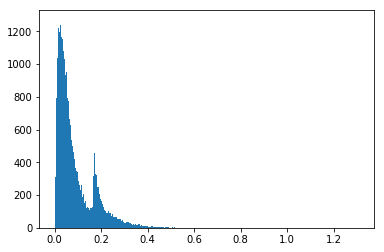

In [424]:
plt.hist(dttt, bins = 600)
plt.show()

In [425]:
pointsmod

[(0.24456153610223508,
  0.4121345727320144,
  0.1680053547523428,
  1.008047562888,
  0.37717490143462384,
  1.6016666666666666),
 (0.2376937025922573,
  0.3366052487960705,
  0.1680053547523428,
  1.0200662715304576,
  0.37717490143462384,
  1.4766666666666666),
 (0.22957228776706504,
  0.33502649379780786,
  0.1680053547523428,
  1.034278747474544,
  0.37717490143462384,
  1.4466666666666668),
 (0.4531227391392992,
  0.43450256864790066,
  0.3353413654618474,
  0.8647248220797125,
  0.5564604233007066,
  1.3966666666666667),
 (0.4638740699840644,
  0.5188186990675242,
  0.3353413654618474,
  0.7966013678319682,
  0.5564604233007066,
  1.2866666666666666),
 (0.4664261313021135,
  0.5792036546145409,
  0.3353413654618474,
  0.801067475138551,
  0.5615300063359672,
  1.2183333333333333),
 (0.47035285018990264,
  0.6245096596152411,
  0.5026773761713521,
  0.8079392331921831,
  0.5633524367843706,
  1.1216666666666666),
 (0.47071288281200213,
  0.6412372704571997,
  0.5026773761713521,


In [556]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(dfmod.values)

In [557]:
pca_result

array([[-0.29680775,  0.96380946,  0.23396575],
       [-0.31319784,  0.9167523 ,  0.23604477],
       [-0.32428068,  0.89533289,  0.23799967],
       ...,
       [-0.01351844, -0.24769246, -0.18467995],
       [-0.01160972, -0.22473167, -0.18358705],
       [-0.00745782, -0.18310219, -0.02513188]])

Text(0.5,1,'Component-wise and Cumulative Explained Variance')

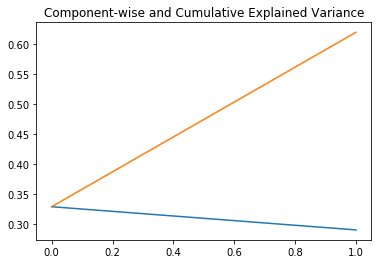

In [448]:
plt.plot(range(3), pca.explained_variance_ratio_)
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [21]:
dfmod = pd.DataFrame(pointsmod)

In [467]:
df

,Mean-Median,Polsby-Popper,Bias,Gini,Gap,Cuts
0,-0.052881,0.171213,-0.222222,0.110644,-0.071761,2361
1,-0.053361,0.163661,-0.222222,0.111605,-0.071761,2286
2,-0.053930,0.163503,-0.222222,0.112742,-0.071761,2268
3,-0.038281,0.173450,-0.166667,0.099178,-0.010803,2238
4,-0.037529,0.181882,-0.166667,0.093728,-0.010803,2172
5,-0.037350,0.187920,-0.166667,0.094085,-0.009080,2131
6,-0.037075,0.192451,-0.111111,0.094635,-0.008460,2073
7,-0.037050,0.194124,-0.111111,0.093762,-0.008460,2048
8,-0.036865,0.203499,-0.111111,0.087255,-0.008460,1962
9,-0.037420,0.205412,-0.111111,0.087242,-0.008460,1957


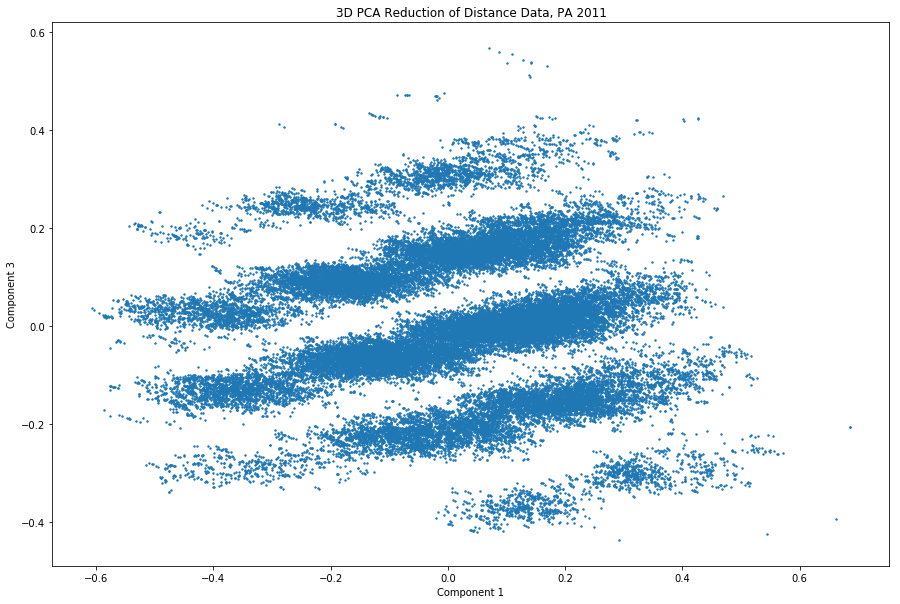

In [573]:
plt.scatter(pca_result[:, 1], pca_result[:, 2], s = 2)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("3D PCA Reduction of Distance Data, PA 2011")
plt.xlabel("Component 1")
plt.ylabel("Component 3")
plt.savefig("PCA3.png", dpi=300)

In [569]:
for i in range(len(pca_result)): 
    if pca_result[i][2] > 0.5:
        print(i, pca_result[i])

10701 [ 0.07010368 -0.29715864  0.56712243]
10702 [ 0.08690138 -0.20896822  0.5592996 ]
10703 [ 0.10929648 -0.13615589  0.55493682]
10704 [ 0.14214821 -0.07717287  0.53979238]
10705 [0.16993522 0.0249406  0.53231247]
10706 [ 0.1419457  -0.02023692  0.53746464]
10707 [ 0.12911866 -0.07168211  0.54341117]
10708 [0.10038616 0.0576645  0.53760967]
22384 [ 0.14057994 -0.09315709  0.50888089]
22385 [ 0.13817033 -0.12668367  0.51266286]


In [463]:
for i in range(len(pca_result)): 
    if pca_result[i][0] > 0.6:
        print(i, pca_result[i])

16070 [0.66246059 0.0204136 ]
41615 [ 0.68630785 -0.12588102]
41616 [ 0.68581756 -0.13124168]


In [468]:
points2[41614], points2[41615], points2[41616]

((-0.014923091829395552,
  0.1733046697131745,
  -0.05555555555555558,
  0.0694490553679087,
  0.09649164409516722,
  1638),
 (0.0009362380224955391,
  0.1734586202009324,
  0.0,
  0.061536011738000544,
  0.09649164409516722,
  1623),
 (0.0009482579765407451,
  0.17390060743427635,
  0.0,
  0.06156005164609088,
  0.09649164409516722,
  1621))

In [472]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(dfmod.values)

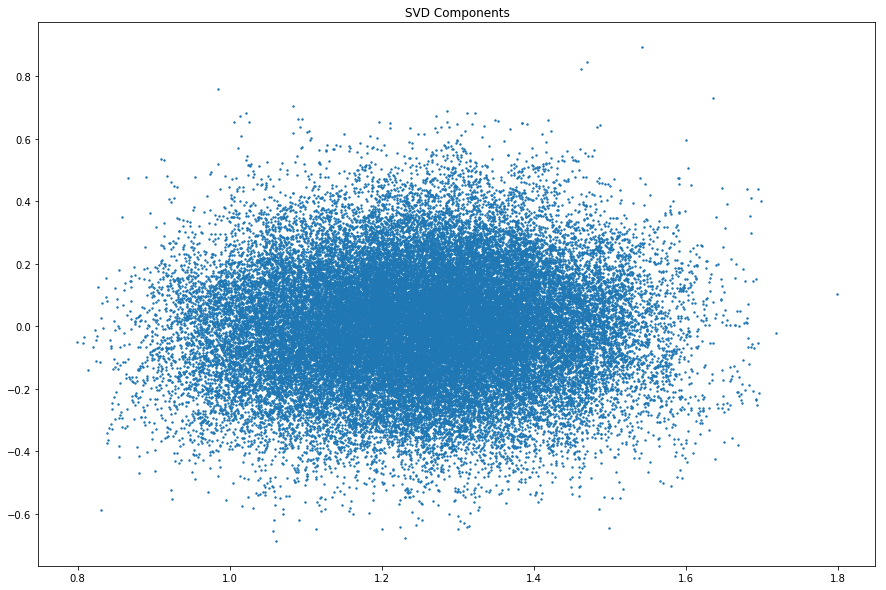

In [477]:
plt.figure(figsize=(15, 10))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1], s = 2)

In [492]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=12) 
X=ICA.fit_transform(df.values)

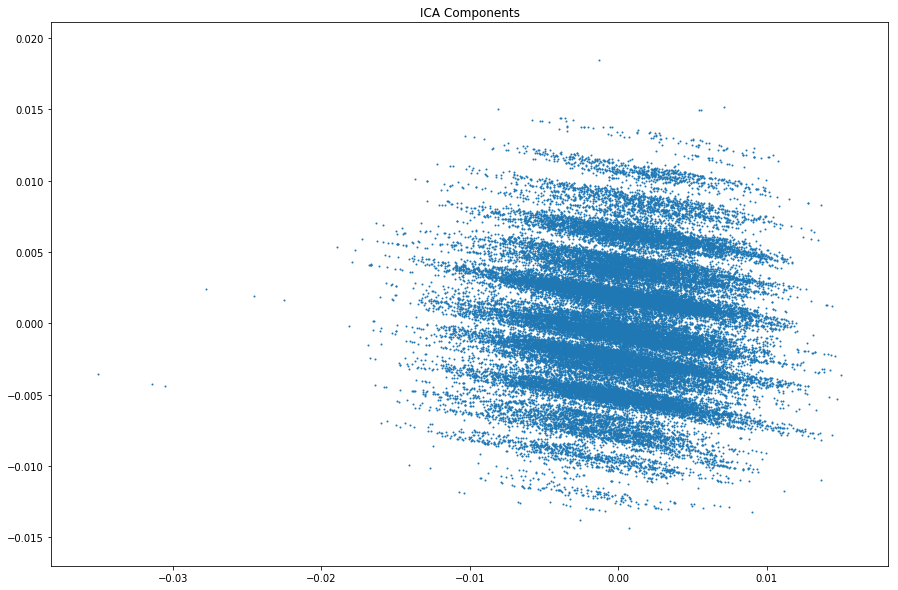

In [493]:
plt.figure(figsize=(15,10))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1], s=1)
#plt.scatter(X[:,1], X[:,2], s=1)
#plt.scatter(X[:,0], X[:,2], s=1)

In [494]:
ICA = FastICA(n_components=3, random_state=12) 
X=ICA.fit_transform(df.values)

In [1]:
plt.figure(figsize=(15,10))
plt.title('ICA Components')
#plt.scatter(X[:,0], X[:,1], s = 1)
plt.scatter(X[:,1], X[:,2], s=1)
#plt.scatter(X[:,0], X[:,2], s=1)



NameError: name 'plt' is not defined

In [517]:
for i in range(len(X)):
    if X[i][0]< -0.008 and X[i][2] < -0.008:
        print(i, points2[i])

5095 (-0.026855101199754317, 0.17245410762105845, -0.2777777777777778, 0.07585776065707119, -0.013648342947527984, 1692)
13446 (-0.030495600605520368, 0.18013555179650015, -0.2777777777777778, 0.08032853539273907, -0.011126031058793544, 1637)
13447 (-0.030443935161104663, 0.17959420776423923, -0.2777777777777778, 0.08022520450390774, -0.011126031058793544, 1648)
13448 (-0.03040285045059732, 0.1788572476495621, -0.2777777777777778, 0.08014303508289261, -0.011126031058793544, 1648)
13449 (-0.030238020596413118, 0.17841764532934054, -0.2777777777777778, 0.07981337537452433, -0.011126031058793544, 1647)
13451 (-0.03160482167988199, 0.17790714584143882, -0.2777777777777778, 0.08062677087843759, -0.011128746336411673, 1625)
13457 (-0.024627597545313296, 0.16753118520454954, -0.2777777777777778, 0.08381468446027779, -0.02097778233139891, 1725)
13458 (-0.024518045870903782, 0.1678000282564297, -0.2777777777777778, 0.08635602626144734, -0.020422055512221735, 1712)
13459 (-0.024540362095872847, 

In [522]:
for i in range(len(X)):
    if X[i][0]< -0.005 and X[i][2] < -0.012:
        print(i, points2[i])

10701 (-0.021690401708477025, 0.2007756296280496, -0.2777777777777778, 0.09369317822774398, 0.04534214941738288, 1547)
10702 (-0.02164318113138508, 0.19874913491234192, -0.2777777777777778, 0.09107672801800586, 0.04534214941738288, 1606)
10703 (-0.02050363303334979, 0.19390853077498785, -0.2777777777777778, 0.08985027879165403, 0.04534214941738288, 1640)
10704 (-0.019612404009206275, 0.19008890042520332, -0.2777777777777778, 0.08066699223340301, 0.04534214941738288, 1667)
10705 (-0.018449582233668105, 0.1828545474932567, -0.2777777777777778, 0.07834134868232659, 0.04534214941738288, 1712)
10706 (-0.020050667795321497, 0.18517204068289078, -0.2777777777777778, 0.0815435198056332, 0.04534214941738288, 1687)
10707 (-0.020092037095268078, 0.18440654884844832, -0.2777777777777778, 0.08421787695556314, 0.04534214941738288, 1643)
10708 (-0.02282359571191772, 0.18172121607284475, -0.2777777777777778, 0.0892257693306411, 0.0410208755973837, 1729)


In [526]:
X[0], X[1], X[2], X[3]

(array([-0.00314517,  0.03445354, -0.00666686]),
 array([-0.00383061,  0.03081918, -0.00625382]),
 array([-0.00400144,  0.02994861, -0.00615165]),
 array([ 0.00303684,  0.02688268, -0.00731761]))

In [544]:
for i in range(len(X)):
    if X[i][0]< -0.0007 and X[i][0]> -0.002 and X[i][2] < 0.0065 and X[i][2] > 0.0047:
        print(i, points2[i])

5889 (-0.043782856163845585, 0.15432545269855644, -0.1111111111111111, 0.0719793430436595, -0.11022624236169778, 1875)
38222 (-0.049224082981620676, 0.15294400759290452, -0.1111111111111111, 0.07792529096622176, -0.11755513869004508, 1926)
42626 (-0.04542886248053468, 0.13537648532536484, -0.1111111111111111, 0.07553142586095957, -0.12161411669213296, 1994)
42627 (-0.04303477718844967, 0.13779502754961703, -0.1111111111111111, 0.07541614480465676, -0.12161411669213296, 1973)
42628 (-0.042973014078575844, 0.13791574120770358, -0.1111111111111111, 0.07553967102440463, -0.12161411669213296, 1974)
42629 (-0.043958128064218116, 0.13878936888710325, -0.1111111111111111, 0.07356944305311997, -0.12709915849926243, 1974)
42630 (-0.04506864772693581, 0.1311219640100374, -0.1111111111111111, 0.05643329696832346, -0.12709915849926243, 2037)
42631 (-0.04460010039880696, 0.13545840010625018, -0.1111111111111111, 0.06252736150050292, -0.12709915849926243, 1995)
42632 (-0.0444943174560431, 0.136013678

In [552]:
for i in range(len(X)):
    if X[i][0] > 0.014 and X[i][2] > 0.002:
        print(i, points2[i])

16070 (0.0025343072412408185, 0.178369922739293, 0.05555555555555558, 0.07306855700078663, 0.05085886946339054, 1770)
21897 (0.0006750675661735261, 0.18591071953884825, 0.05555555555555558, 0.06867194123727696, 0.011399731042700999, 1591)


In [555]:
df[df["Bias"] > 0.05]

,Mean-Median,Polsby-Popper,Bias,Gini,Gap,Cuts
16070,0.002534,0.178370,0.055556,0.073069,0.050859,1770
21897,0.000675,0.185911,0.055556,0.068672,0.011400,1591


In [ ]:
from sklearn import manifold 
trans_data = manifold.Isomap(n_neighbors=5, n_components=2, n_jobs=-1).fit_transform(dfmod.values)

In [3]:
iso = pd.read_csv("iso2.csv")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

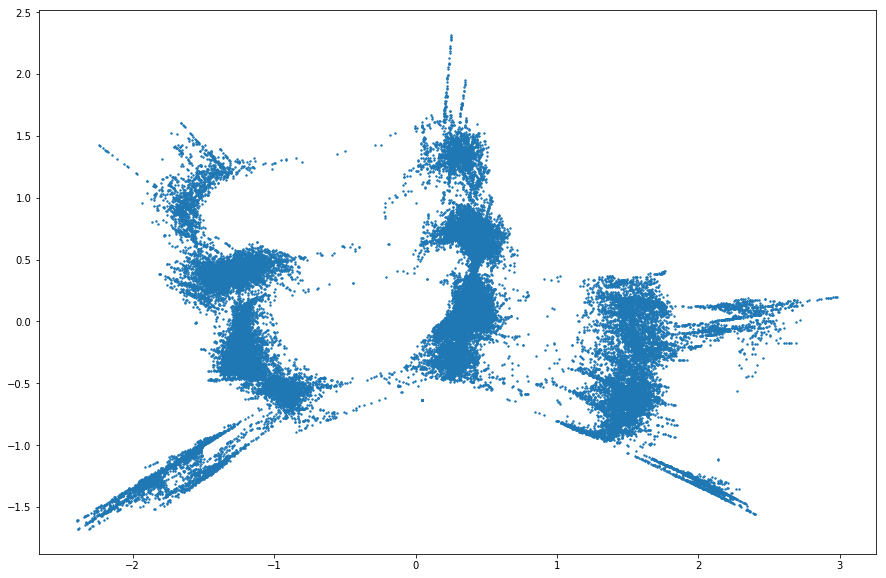

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(iso["0"], iso["1"], s = 2)


In [10]:
data = pd.read_csv("PA_NC_50000_20190720")

In [14]:
data.values[0], iso.values[0]

(array([ 0.00000000e+00, -4.22335185e-02,  1.69214366e-01, -1.66666667e-01,
         6.47216385e-02, -6.48450835e-02,  1.73400000e+03]),
 array([ 0.        , -1.11570079,  0.4733777 ]))

In [16]:
for i in range(len(iso.values)): 
    if iso.values[i][2] > 1.7: 
        print(data.values[i])

[ 2.24000000e+03 -4.57699804e-02  1.70798876e-01 -1.11111111e-01
  8.49264339e-02 -1.86943696e-01  1.60900000e+03]
[ 2.24100000e+03 -5.11035429e-02  1.72674254e-01 -1.11111111e-01
  8.58596629e-02 -1.86810286e-01  1.59100000e+03]
[ 2.24200000e+03 -5.11660223e-02  1.76224209e-01 -1.11111111e-01
  8.59846217e-02 -1.86810286e-01  1.60200000e+03]
[ 2.24300000e+03 -5.10853823e-02  1.73181625e-01 -1.11111111e-01
  8.79542669e-02 -1.86810286e-01  1.59700000e+03]
[ 2.24400000e+03 -5.10419544e-02  1.73032406e-01 -1.11111111e-01
  8.77886726e-02 -1.86810286e-01  1.62000000e+03]
[ 5.00300000e+03 -5.02352088e-02  1.69373126e-01 -1.11111111e-01
  8.56620588e-02 -1.98537751e-01  1.63000000e+03]
[ 5.00400000e+03 -5.04910235e-02  1.72464624e-01 -1.11111111e-01
  8.58597083e-02 -1.98537751e-01  1.63400000e+03]
[ 5.00700000e+03 -5.03693707e-02  1.72729680e-01 -1.11111111e-01
  8.51142811e-02 -2.01083052e-01  1.65800000e+03]
[ 5.99100000e+03 -5.50861959e-02  1.94113559e-01 -1.11111111e-01
  9.67350796e-0

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
tsne = pd.read_csv("tsne_full.csv")

In [20]:
del tsne["Unnamed: 0"]

In [22]:
tsne = tsne.values

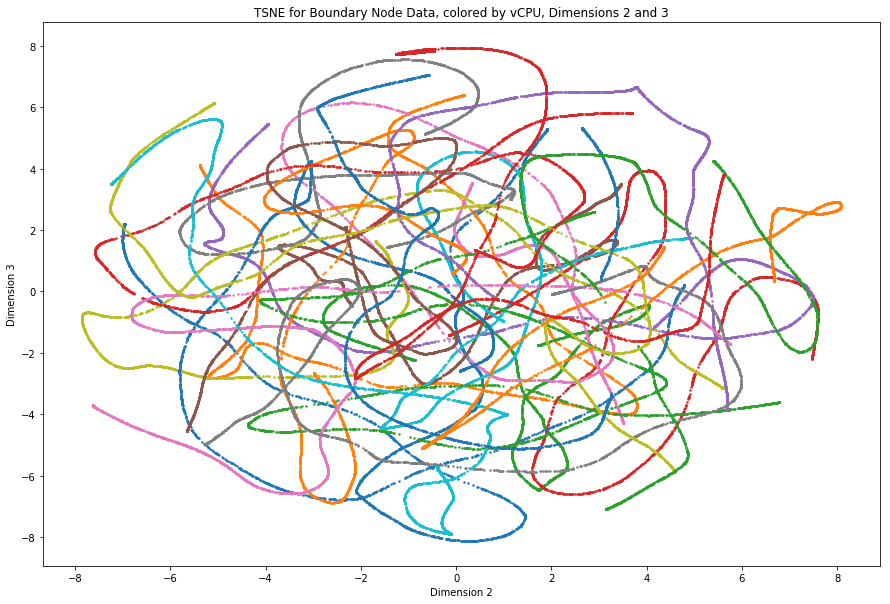

In [30]:
k = 2125
plt.figure(figsize=(15,10))
for i in range(24):
    plt.scatter(tsne[k*i:k*(i+1), 1], tsne[k*i:k*(i+1), 2], s = 2)
plt.title("TSNE for Boundary Node Data, colored by vCPU, Dimensions 2 and 3")
plt.xlabel("Dimension 2")
plt.ylabel("Dimension 3")
plt.savefig("TSNEC3.png")

array([[-2.4602416, -6.963833 ,  2.2092335],
       [-2.4612052, -6.963561 ,  2.2103999],
       [-2.4616494, -6.9633374,  2.2104604],
       ...,
       [-0.8676942,  5.616638 ,  3.7927837],
       [-0.8681072,  5.6164527,  3.7916548],
       [-0.8683289,  5.616373 ,  3.7910926]])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
neutral = pd.read_csv("data/generated_datasets/PA_NC_50000_20190720")

In [4]:
gop = pd.read_csv("data/generated_datasets/PA_GOP_50000_20190721")

In [5]:
mmrange = np.linspace(-0.08, 0.00, 20)
pprange = np.linspace(0.12, 0.23, 20)
bias = sorted(np.asarray(list(set(neutral["Bias"]))))
grange = np.linspace(0.03, 0.11, 20)
egrange = np.linspace(-0.2, 0.14, 20)
crange = np.linspace(1400, 2000, 20)

NameError: name 'df' is not defined

In [21]:
min(gop["Gini"])

0.04596130166955795

In [15]:
sorted(np.asarray(list(set(gop["Bias"]))))

[0.05555555555555558,
 0.11111111111111116,
 0.16666666666666666,
 0.2222222222222222,
 0.2777777777777778]